<a href="https://colab.research.google.com/github/nour55/ProjectFinal/blob/master/Testfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!git clone https://github.com/nour55/ProjectFinal

Cloning into 'ProjectFinal'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 51945 (delta 5), reused 0 (delta 0), pack-reused 51929
Receiving objects: 100% (51945/51945), 302.02 MiB | 36.21 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (51939/51939), done.


In [13]:
pip install tensorflow keras sklearn matplotlib pandas pillow


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [16]:

data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'/content/ProjectFinal/Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            print(a)

        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
00035_00033_00024.png
00035_00029_00018.png
00035_00026_00015.png
00035_00018_00001.png
00035_00008_00017.png
00035_00025_00027.png
00035_00002_00028.png
00035_00015_00008.png
00035_00006_00022.png
00035_00004_00011.png
00035_00003_00000.png
00035_00020_00006.png
00035_00023_00024.png
00035_00008_00020.png
00035_00036_00004.png
00035_00001_00000.png
00035_00000_00028.png
00035_00009_00006.png
00035_00017_00023.png
00035_00037_00027.png
00035_00002_00004.png
00035_00001_00028.png
00035_00032_00013.png
00035_00023_00006.png
00035_00005_00009.png
00035_00031_00019.png
00035_00025_00019.png
00035_00004_00025.png
00035_00004_00012.png
00035_00011_00025.png
00035_00017_00025.png
00035_00033_00002.png
00035_00034_00001.png
00035_00020_00004.png
00035_00021_00002.png
00035_00005_00025.png
00035_00009_00001.png
00035_00008_00002.png
00035_00010_00022.png
00035_00010_00009.png
00035_00030_00008.png
00035_00039_00017.pn

In [17]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39259, 30, 30, 3) (39259,)
(31407, 30, 30, 3) (7852, 30, 30, 3) (31407,) (7852,)


In [0]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15
982/982 [==============================] - 6s 6ms/step - loss: 1.5745 - accuracy: 0.5967 - val_loss: 0.2898 - val_accuracy: 0.9328
Epoch 2/15
982/982 [==============================] - 5s 6ms/step - loss: 0.4139 - accuracy: 0.8886 - val_loss: 0.0924 - val_accuracy: 0.9786
Epoch 3/15
982/982 [==============================] - 6s 6ms/step - loss: 0.2831 - accuracy: 0.9254 - val_loss: 0.0778 - val_accuracy: 0.9815
Epoch 4/15
982/982 [==============================] - 5s 6ms/step - loss: 0.2338 - accuracy: 0.9385 - val_loss: 0.0638 - val_accuracy: 0.9829
Epoch 5/15
982/982 [==============================] - 6s 6ms/step - loss: 0.2075 - accuracy: 0.9456 - val_loss: 0.1257 - val_accuracy: 0.9707
Epoch 6/15
982/982 [==============================] - 6s 6ms/step - loss: 0.2132 - accuracy: 0.9470 - val_loss: 0.0743 - val_accuracy: 0.9809
Epoch 7/15
982/982 [==============================] - 6s 6ms/step - loss: 0.1903 - accuracy: 0.9526 - val_loss: 0.0564 - val_accuracy: 0.9862
Epoch 

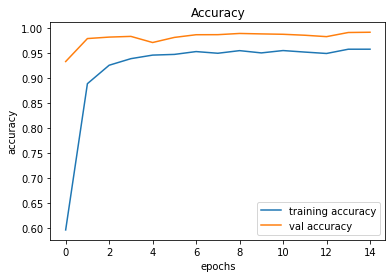

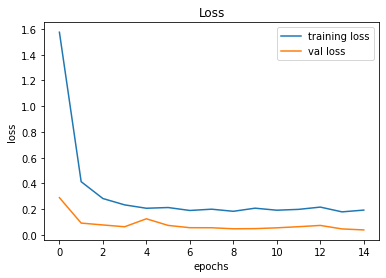

In [20]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:


y_test = pd.read_csv('/content/ProjectFinal/Test.csv')


In [0]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

pimgs='ProjectFinal/'+imgs

In [25]:
print(pimgs)

['ProjectFinal/Test/00000.png' 'ProjectFinal/Test/00001.png'
 'ProjectFinal/Test/00002.png' ... 'ProjectFinal/Test/12627.png'
 'ProjectFinal/Test/12628.png' 'ProjectFinal/Test/12629.png']


In [0]:
from sklearn.metrics import accuracy_score

In [32]:

data=[]
for img in pimgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

    print(img)
X_test=np.array(data)
pred = model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('ProjectFinal/traffic_classifier.h5')


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
ProjectFinal/Test/07632.png
ProjectFinal/Test/07633.png
ProjectFinal/Test/07634.png
ProjectFinal/Test/07635.png
ProjectFinal/Test/07636.png
ProjectFinal/Test/07637.png
ProjectFinal/Test/07638.png
ProjectFinal/Test/07639.png
ProjectFinal/Test/07640.png
ProjectFinal/Test/07641.png
ProjectFinal/Test/07642.png
ProjectFinal/Test/07643.png
ProjectFinal/Test/07644.png
ProjectFinal/Test/07645.png
ProjectFinal/Test/07646.png
ProjectFinal/Test/07647.png
ProjectFinal/Test/07648.png
ProjectFinal/Test/07649.png
ProjectFinal/Test/07650.png
ProjectFinal/Test/07651.png
ProjectFinal/Test/07652.png
ProjectFinal/Test/07653.png
ProjectFinal/Test/07654.png
ProjectFinal/Test/07655.png
ProjectFinal/Test/07656.png
ProjectFinal/Test/07657.png
ProjectFinal/Test/07658.png
ProjectFinal/Test/07659.png
ProjectFinal/Test/07660.png
ProjectFinal/Test/07661.png
ProjectFinal/Test/07662.png
ProjectFinal/Test/07663.png
ProjectFinal/Test/07664.pn

In [28]:
!git clone https://github.com/nour55/ProjectFinal/blob/master/gui.py

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Cloning into 'gui.py'...
fatal: repository 'https://github.com/nour55/ProjectFinal/blob/master/gui.py/' not found
